In [2]:
'''一、数据的导入'''
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
# 50000训练集,10000测试集
# x_train:50000*32*32 y_train:50000 x_test:10000*32*32 y_test:10000
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print(x_img_train[0,:,:,0]) # 某个图像的某通道

[[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]


In [4]:
print(y_label_train) # 所有标签

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
'''二、数据的处理'''
# 标准化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
# One-Hot编码
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
print(y_label_train_OneHot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [7]:
'''三、建立模型'''
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

# 创建多层顺序连接的神经网络
model = Sequential()
# 卷积层 1，32*32的图像，共32个
model.add(Conv2D(filters=32,kernel_size=(3,3), # 32个3*3的卷积核
                 input_shape=(32,32,3), # 形状:32高 * 32宽 * 3通道
                 activation='relu', # Relu激活函数
                 padding='same')) # 输入输出尺寸相同
# Dropout层，随机丢弃25%输入神经元（置为0）
model.add(Dropout(0.25))

# 池化层（降采样层） 1，16*16的图像，共32个
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷积层 2，16*16的图像，共64个
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same')) # 64个3*3的卷积核 
model.add(Dropout(0.25))

# 池化层（降采样层） 2，8*8的图像，共64个
model.add(MaxPooling2D(pool_size=(2, 2)))

# 平坦层 8*8*64个神经元
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 隐藏层（全连接层） 1024个神经元
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 输出层（全连接层） 对应0-9这10个类别
model.add(Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [9]:
'''四、训练模型'''
# 编译模型（误差函数交叉熵、Adam梯度下降、指标准确度）
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
# 训练模型
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, # 训练集
                        validation_split=0.2, # 20%用作验证集
                        epochs=10, batch_size=128, verbose=1) # 10次迭代训练、每批次 128张，输出记录

Epoch 1/10
313/313 [==============================] - 56s 30ms/step - loss: 1.5822 - accuracy: 0.4305 - val_loss: 1.3697 - val_accuracy: 0.5420
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 1.2103 - accuracy: 0.5690 - val_loss: 1.1852 - val_accuracy: 0.6155
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 1.0591 - accuracy: 0.6249 - val_loss: 1.0799 - val_accuracy: 0.6435
Epoch 4/10
313/313 [==============================] - 5s 16ms/step - loss: 0.9525 - accuracy: 0.6656 - val_loss: 1.0338 - val_accuracy: 0.6581
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 0.8549 - accuracy: 0.6983 - val_loss: 0.9370 - val_accuracy: 0.6969
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 0.7683 - accuracy: 0.7299 - val_loss: 0.8982 - val_accuracy: 0.7009
Epoch 7/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6990 - accuracy: 0.7522 - val_loss: 0.8566 - val_accuracy: 0.712

In [10]:
print(train_history.history)

{'loss': [1.5821951627731323, 1.210253357887268, 1.0591429471969604, 0.9524805545806885, 0.8549293875694275, 0.7683344483375549, 0.6989914774894714, 0.6292139887809753, 0.5511401295661926, 0.48703888058662415], 'accuracy': [0.43050000071525574, 0.5689749717712402, 0.6248999834060669, 0.6655750274658203, 0.6982750296592712, 0.7299000024795532, 0.752174973487854, 0.777649998664856, 0.8050249814987183, 0.82955002784729], 'val_loss': [1.369737148284912, 1.185239315032959, 1.0798834562301636, 1.0338222980499268, 0.9369860291481018, 0.8982312679290771, 0.8565863966941833, 0.8376029133796692, 0.8034524321556091, 0.7930313348770142], 'val_accuracy': [0.5419999957084656, 0.6154999732971191, 0.6434999704360962, 0.6581000089645386, 0.6969000101089478, 0.7009000182151794, 0.7127000093460083, 0.7184000015258789, 0.7282000184059143, 0.7286999821662903]}


In [11]:
'''五、测试模型'''
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)

In [12]:
print(scores)

[0.8092432618141174, 0.7232999801635742]


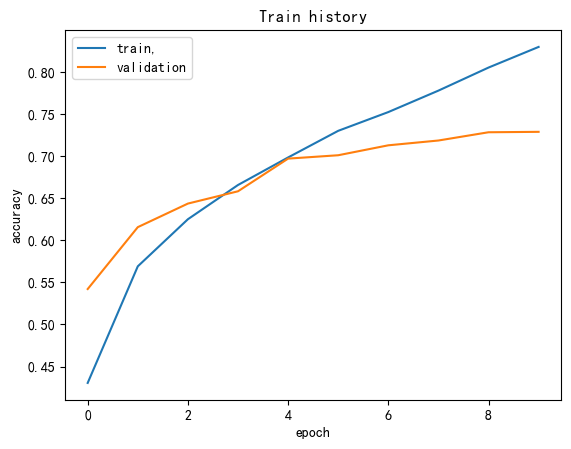

In [13]:
'''六、相关信息可视化'''
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train,','validation'],loc='upper left')

# 准确率变化曲线
plt.figure(1)
show_train_history(train_history,'accuracy','val_accuracy')

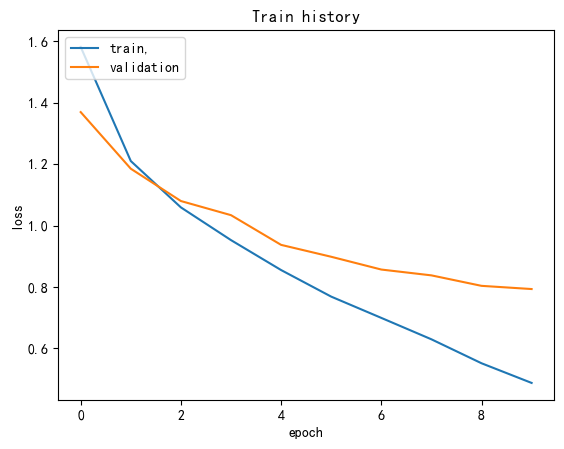

In [14]:
# 损失率变化曲线
plt.figure(2)
show_train_history(train_history,'loss','val_loss')

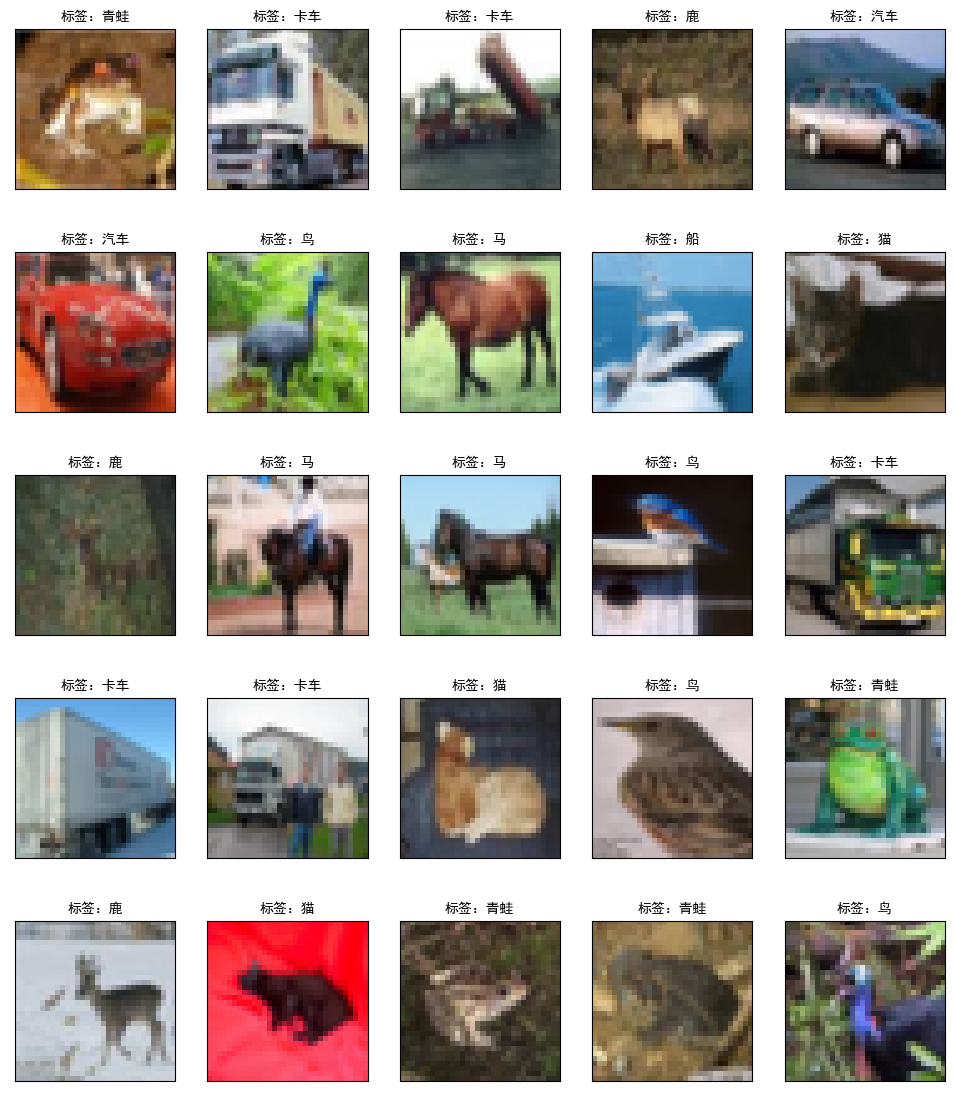

In [15]:
# 输出25张原数据集的图像
label_dict={0:'飞机',1:'汽车',2:'鸟',3:'猫',4:'鹿',5:"狗",6:'青蛙',7:'马',8:'船',9:'卡车'}
#显示几张图片和标签
def show_images_labels_prediction(images,labels,prediction,idx,num=10):
    flig=plt.figure(figsize=(12,14))
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='标签：'+str(label_dict[labels[i][0]])
        if len(prediction)>0:
            title+=',预测：'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
show_images_labels_prediction(x_img_train,y_label_train,[],0,25)

[3 8 8 ... 5 1 7]


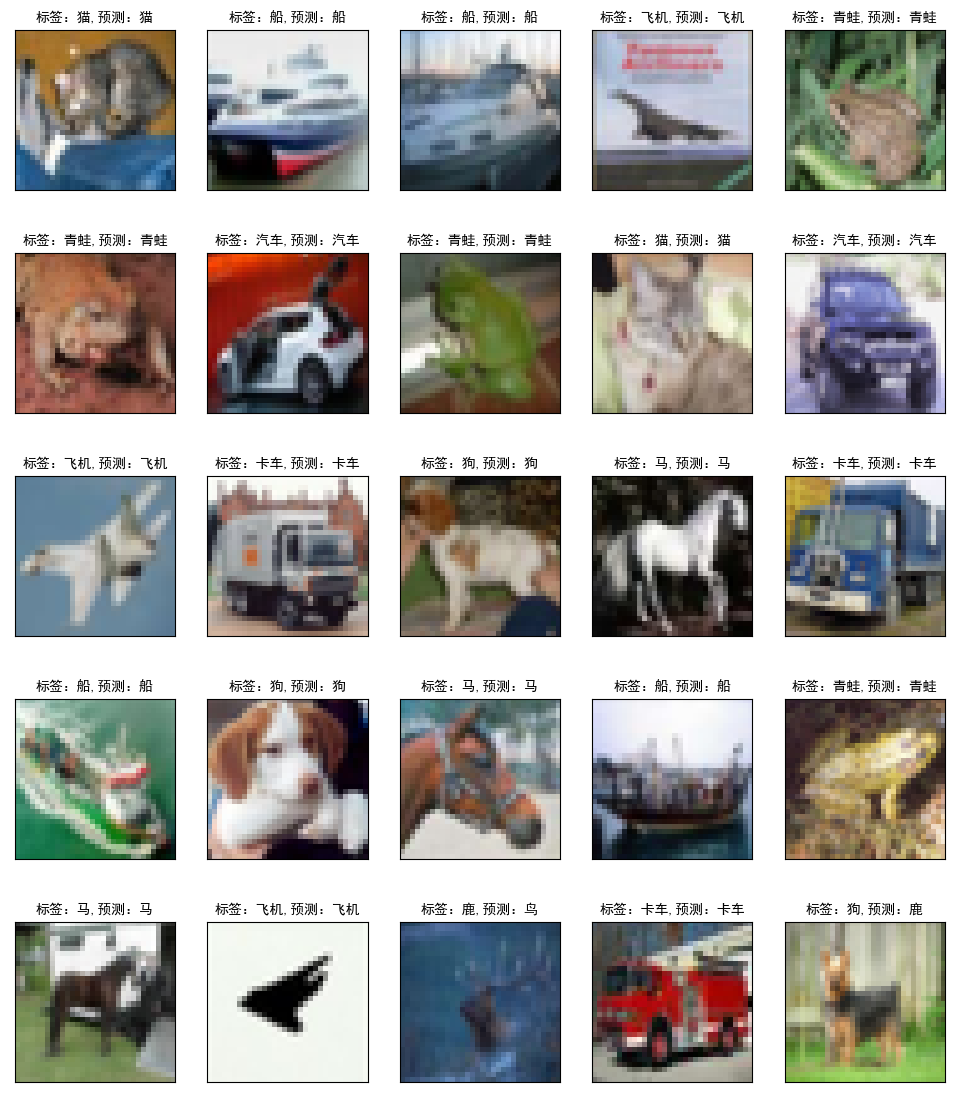

In [16]:
# 显示测试集中预测和真实标签
predicted_probability=model.predict(x_img_test_normalize)
prediction=np.argmax(predicted_probability, axis=-1)
print(prediction)
show_images_labels_prediction(x_img_test,y_label_test,prediction,0,25)

In [17]:
# 混淆矩阵
import pandas as pd
# confusion_matrix = pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])
# print(confusion_matrix)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,808,14,29,10,17,3,14,14,67,24
1,22,837,11,9,6,5,9,9,31,61
2,79,2,602,32,134,34,65,38,12,2
3,29,6,95,443,126,149,88,42,12,10
4,24,2,55,30,753,20,44,56,14,2
5,12,3,77,126,86,585,41,54,13,3
6,5,4,36,30,53,15,845,3,7,2
7,13,1,37,23,87,34,10,787,4,4
8,61,30,18,11,8,4,6,4,845,13
